In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from matplotlib import pyplot as plt

# can be installed using 
# pip install metapredict
# for docs see https://metapredict.readthedocs.io/
import metapredict as meta



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Read in data
Read in the comparison data computed on our local computing hardware

In [4]:
df = pd.read_csv('data/comparison_data.tsv', delim_whitespace=True)
print(df)

         idx  valid_aa  auc_C  meta_C  Total_aa  AUC_time  meta_time
0    DP00206       122     96      90       157     25.94       0.68
1    DP01112       686    651     610       724     93.12       0.72
2    DP01118       427    365     391       499    356.78       0.75
3    DP01119       590    575     565       781     60.59       0.82
4    DP01124       102    101      57       457    190.82       0.69
..       ...       ...    ...     ...       ...       ...        ...
195  DP02317       279    206     214       289     50.90       0.69
196  DP02325        78     71      69        86     43.00       0.69
197  DP02327       122     18      45       270     59.97       0.69
198  DP02333        90     85      77       404     65.93       0.73
199  DP02334       135    100      87      1162    324.66       0.76

[200 rows x 7 columns]


## Plot the data
Generate the two plots to be included as supplementary information

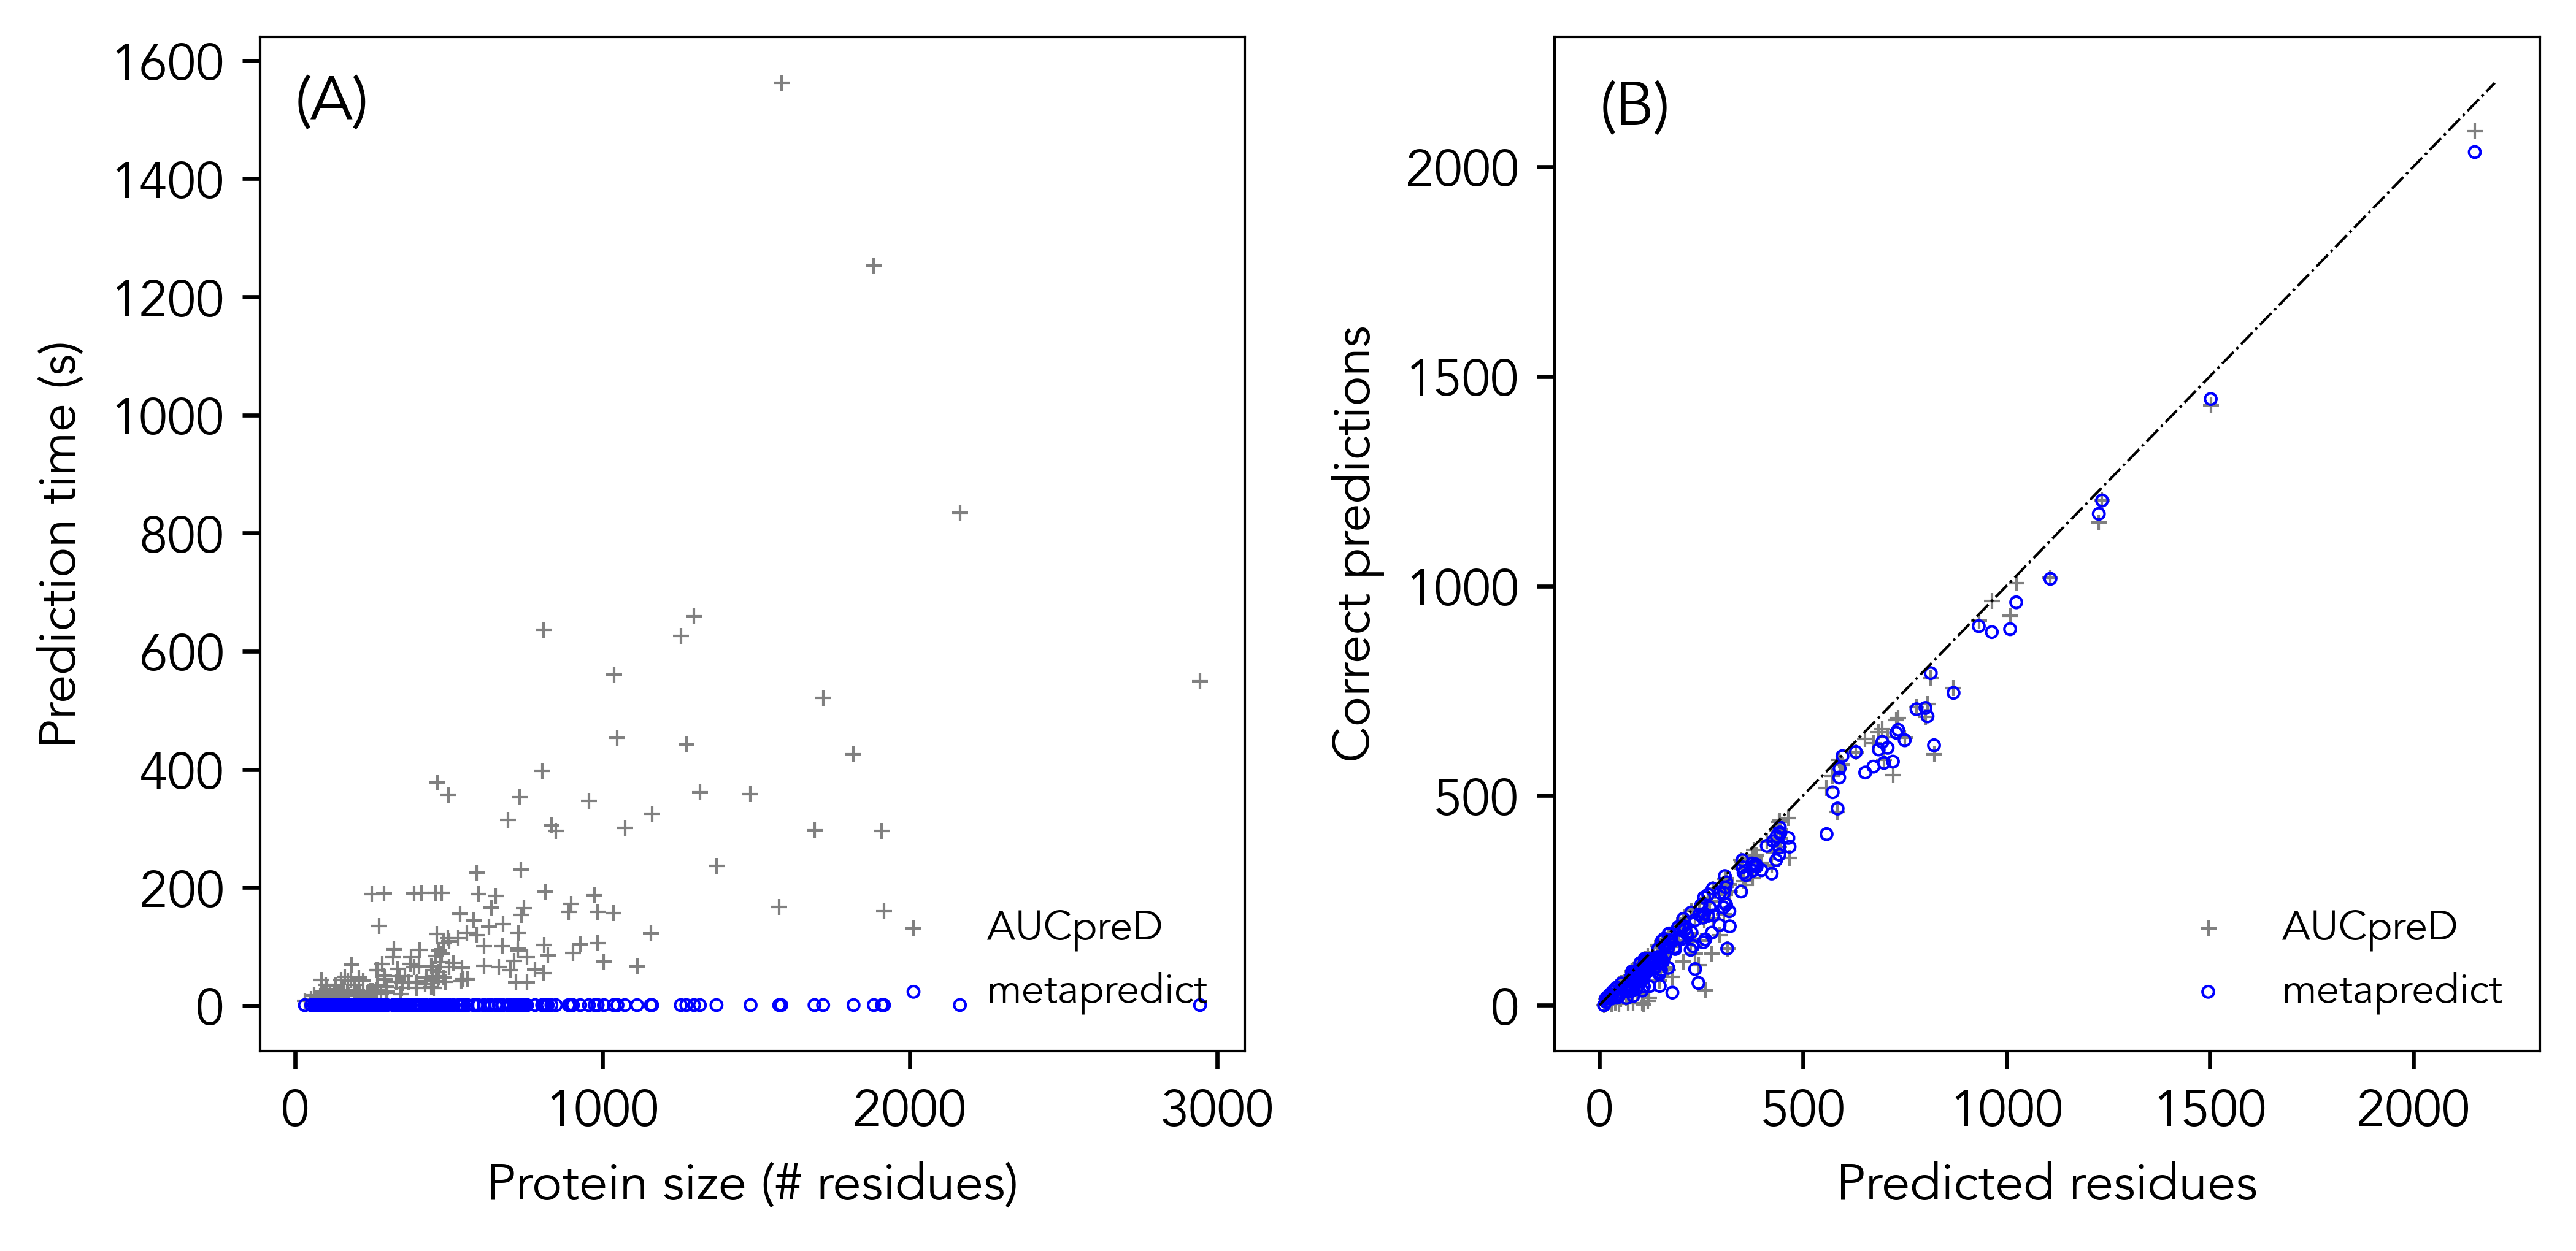

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(7.1,3.5), dpi=300)
ax1, ax2 = axs

ax1.scatter(df.Total_aa, df.AUC_time, marker='+', s=10, color='gray', linewidth=0.5, label='AUCpreD')
ax1.scatter(df.Total_aa, df.meta_time, marker='o', s=5, color='none', linewidth=0.5, edgecolor='blue',label='metapredict')
ax1.set_ylabel('Prediction time (s)', fontweight='bold')
ax1.set_xlabel('Protein size (# residues)', fontweight='bold')
ax1.legend(fontsize=8, loc='lower right', frameon=False)
ax1.text(0, 1500,'(A)', fontsize=12)

ax2.plot([0, 2200], [0, 2200], 'k-.', linewidth=0.5)
ax2.scatter(df.valid_aa, df.auc_C , marker='+', s=10, color='gray', linewidth=0.5, label='AUCpreD')
ax2.scatter(df.valid_aa, df.meta_C , marker='o', s=5, color='none', linewidth=0.5, edgecolor='blue', label='metapredict')
ax2.set_xlabel('Predicted residues', fontweight='bold')
ax2.set_ylabel('Correct predictions', fontweight='bold')
ax2.legend(fontsize=8, loc='lower right', frameon=False)
ax2.text(0, 2100,'(B)', fontsize=12)

plt.tight_layout()
plt.savefig('figures/length_vs_time_and_accuracy.pdf')
plt.show()

## Correlation between length and prediction time

In [28]:
print(f"Pearson's correlation coefficient for AUCPreD time vs. sequence length: {np.corrcoef(list(df.Total_aa), list(df.AUC_time))[0][1]}")

print(f"Pearson's correlation coefficient for AUCPreD time vs. sequence length: {np.corrcoef(list(df.Total_aa), list(df.meta_time))[0][1]}")
      

Pearson's correlation coefficient for AUCPreD time vs. sequence length: 0.7059790523551697
Pearson's correlation coefficient for AUCPreD time vs. sequence length: 0.8816062546936679


## Compute approximate $\dfrac{d\text{time}}{d\text{length}}$ 

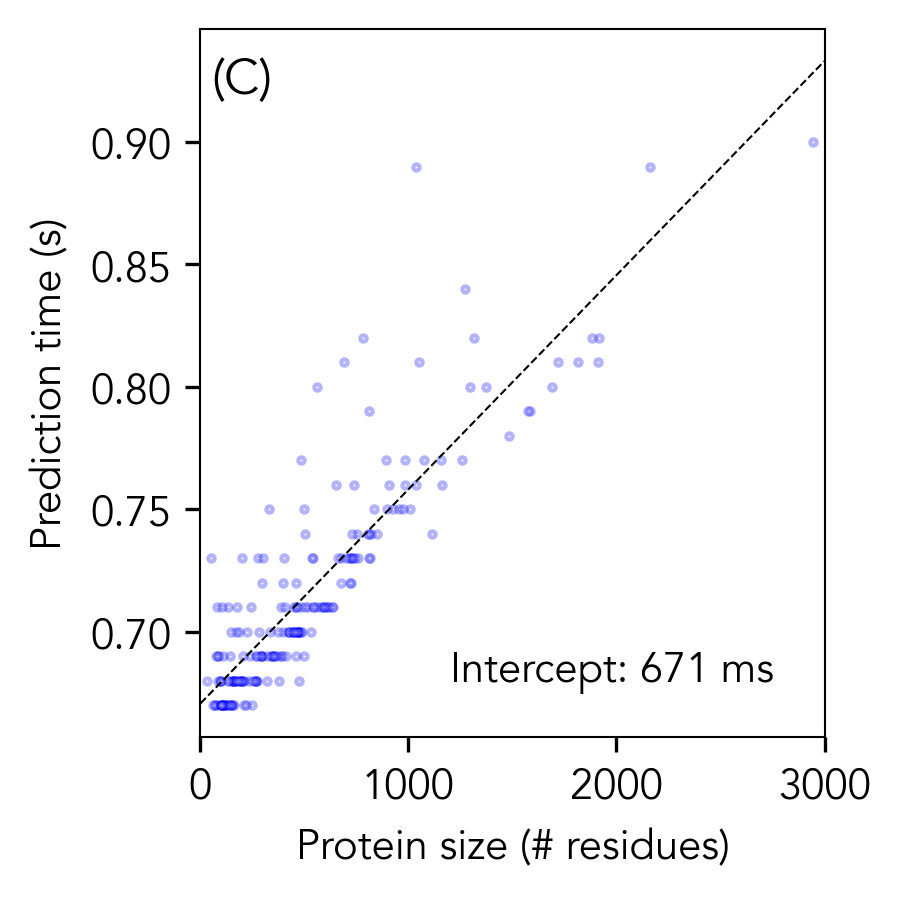

In [105]:
figure(num=None, figsize=(3.1, 3.1), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.plot(df.Total_aa, df.meta_time,'.', ms=3,mec='b',mfc='w',alpha=0.3)
fv_meta = np.polyfit(list(df.Total_aa), list(df.meta_time),1)
xvals = np.arange(0,3000)
yvals = xvals*fv_meta[0]+fv_meta[1]
plt.plot(xvals,yvals,'--k',lw=0.5)
plt.xlim([0,3000])
plt.ylabel('Prediction time (s)')
plt.xlabel('Protein size (# residues)')

fv_meta[1]*1000
plt.text(1200, 0.68, "Intercept: %1.0f ms" %(1000*fv_meta[1]))
plt.text(50, 0.92,'(C)', fontsize=12)
plt.tight_layout()
plt.savefig('figures/metapredict_inset.pdf')



In [29]:
fv = np.polyfit(list(df.Total_aa), list(df.AUC_time),1)
print(f'dt/dsequence = {fv[0]}')

dt/dsequence = 0.29579626936680997


## Plot the linear dependence
This is included locally just to show this relationship. The assumption of linarity is not _great_ but probably sufficient for an approximate description of the length _vs._ time.

Text(0.5, 0, 'Protein size (# residues)')

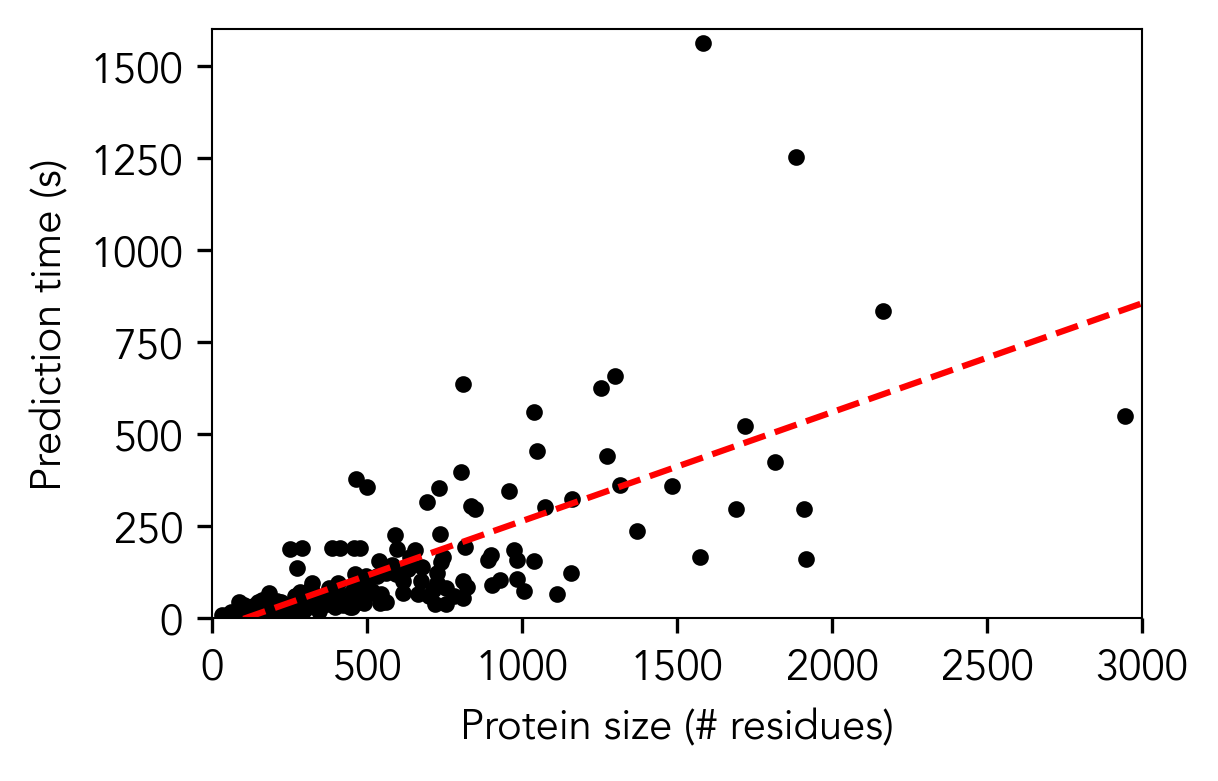

In [43]:
figure(num=None, figsize=(4, 2.6), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

xvals = np.arange(0,3000)
yvals = xvals*fv[0]+fv[1]

plt.plot(list(df.Total_aa),list(df.AUC_time),'.k')
plt.plot(xvals,yvals,'--r')
plt.ylim([0,1600])
plt.xlim([0,3000])

plt.ylabel('Prediction time (s)', fontweight='bold')
plt.xlabel('Protein size (# residues)', fontweight='bold')
